In [1]:
# Plot replication of BarSeq experiments
# Supplemental Figure 3

In [1]:
import os

import pandas as pd
from scipy.stats import pearsonr, spearmanr

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
# figure save directory
save_dir = "../../results/figures/replication"
os.makedirs(save_dir, exist_ok=True)

In [3]:
input_file = '../../results/barseq/pkr-replicate-barcode-reads_240228.csv'
df = pd.read_csv(input_file)

/tmp/ipykernel_3354385/2262820699.py:2: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


In [4]:
# remove variants at sites of non-interest
pkr_range = [(255,278),(371,385),(448,455),(480,506)]
pkr_sites = []

for i, (start, end) in enumerate(pkr_range):
    for site in range(start, end+1):
        pkr_sites.append(site)

df_wt = df.query('pkr == "PKR-WT"')
temp_df = df.query('pkr != "PKR-WT"')
temp_df.dropna(subset=['site'], inplace=True)
temp_df['site'] = temp_df['site'].astype(int)
df_vars = temp_df[temp_df['site'].isin(pkr_sites)]

df = pd.concat([df_wt,df_vars])

/tmp/ipykernel_3354385/656947461.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.dropna(subset=['site'], inplace=True)
/tmp/ipykernel_3354385/656947461.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['site'] = temp_df['site'].astype(int)


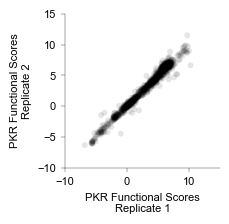

Pearson correlation coefficient: 0.9896880164243964
Spearman correlation coefficient: 0.9756046169272118


In [5]:
# Replication of the whole barseq experiment, all conditions

temp_df = df.groupby(['replicate','k3','pkr'])['auc'].mean().reset_index()
temp_df = temp_df.pivot_table(index=['pkr','k3'], columns='replicate', values='auc').reset_index()
temp_df = temp_df.query('k3 != "SUI2"')
temp_df = temp_df[~temp_df.isin([np.inf, -np.inf]).any(axis=1)]
temp_df = temp_df.dropna()
temp_df

width_in = 2
height_in = 2
font_size = 8
font_name = 'Arial'
stroke = .25
tick_len = 3
alpha_val = .1
marker_diameter = 3 # 1.75

font = {'family': font_name, 'size': font_size}
plt.rc('font', **font)
plt.rc('lines', linewidth=stroke)
plt.figure(figsize=(width_in, height_in)) # save size

plot_name = f'replication_barseq-experiment_{width_in}x{height_in}.svg'
output_file = os.path.join(save_dir, plot_name)

ax = sns.scatterplot(
    data=temp_df,
    x='Replicate 1',
    y='Replicate 2',
    color='black',
    alpha=alpha_val,
    size=marker_diameter,
    legend=False,
    edgecolor='none',
)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(stroke)
ax.spines['bottom'].set_linewidth(stroke)

# Set x and y limits
ax.set_xlim(-10, 15)
ax.set_ylim(-10, 15)

# Set tick parameters
ax.tick_params(axis='both', which='both', direction='out', length=3, width=stroke)

# Set font properties for axis labels
ax.set_xlabel('PKR Functional Scores\nReplicate 1', fontsize=font_size, fontname=font_name)
ax.set_ylabel('PKR Functional Scores\nReplicate 2', fontsize=font_size, fontname=font_name)

#plt.tight_layout()
fig = ax.get_figure()
fig.savefig(output_file, format='svg', bbox_inches='tight', transparent=False)
plt.show()

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(temp_df['Replicate 1'], temp_df['Replicate 2'])
print("Pearson correlation coefficient:", pearson_corr)

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(temp_df['Replicate 1'], temp_df['Replicate 2'])
print("Spearman correlation coefficient:", spearman_corr)

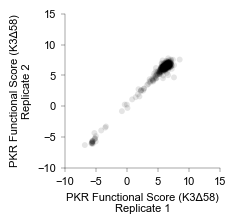

Pearson correlation coefficient: 0.9882418081915763
Spearman correlation coefficient: 0.7558195031999132


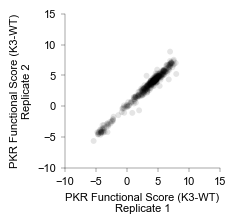

Pearson correlation coefficient: 0.988608520496007
Spearman correlation coefficient: 0.9741401216896624


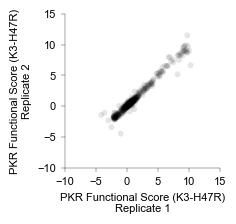

Pearson correlation coefficient: 0.9849936369766535
Spearman correlation coefficient: 0.9767244684463626


In [6]:
# Replication for each K3 condition

for k3, k3_name in zip(['K3L-Null','K3L-WT','K3L-H47R'],["K3Δ58","K3-WT","K3-H47R"]):
    temp_df = df.query('k3 == @k3')
    temp_df = temp_df.groupby(['replicate','k3','pkr'])['auc'].mean().reset_index()
    temp_df = temp_df.pivot_table(index=['pkr','k3'], columns='replicate', values='auc').reset_index()
    temp_df = temp_df.query('k3 != "SUI2"')
    temp_df = temp_df[~temp_df.isin([np.inf, -np.inf]).any(axis=1)]
    temp_df = temp_df.dropna()
    temp_df
    
    width_in = 2
    height_in = 2
    font_size = 8
    font_name = 'Arial'
    stroke = .25
    tick_len = 3
    alpha_val = .1
    marker_diameter = 3 # 1.75
    
    font = {'family': font_name, 'size': font_size}
    plt.rc('font', **font)
    plt.rc('lines', linewidth=stroke)
    plt.figure(figsize=(width_in, height_in)) # save size

    plot_name = f'replication_{k3_name}_{width_in}x{height_in}.svg'
    output_file = os.path.join(save_dir, plot_name)
    
    ax = sns.scatterplot(
        data=temp_df,
        x='Replicate 1',
        y='Replicate 2',
        color='black',
        alpha=alpha_val,
        size=3,
        legend=False,
        edgecolor='none',
    )
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(stroke)
    ax.spines['bottom'].set_linewidth(stroke)
    
    # Set x and y limits
    ax.set_xlim(-10, 15)
    ax.set_ylim(-10, 15)
    
    # Set tick parameters
    ax.tick_params(axis='both', which='both', direction='out', length=3, width=stroke)
    
    # Set font properties for axis labels
    ax.set_xlabel(f'PKR Functional Score ({k3_name})\nReplicate 1', fontsize=font_size, fontname=font_name)
    ax.set_ylabel(f'PKR Functional Score ({k3_name})\nReplicate 2', fontsize=font_size, fontname=font_name)
    
    # Set tick marks and labels every 5 units
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    
    #plt.tight_layout()
    fig = ax.get_figure()
    fig.savefig(output_file, format='svg', bbox_inches='tight', transparent=False)
    plt.show()
    
    # Calculate Pearson correlation
    pearson_corr, _ = pearsonr(temp_df['Replicate 1'], temp_df['Replicate 2'])
    print("Pearson correlation coefficient:", pearson_corr)
    
    # Calculate Spearman correlation
    spearman_corr, _ = spearmanr(temp_df['Replicate 1'], temp_df['Replicate 2'])
    print("Spearman correlation coefficient:", spearman_corr)